Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Nicolás Guarín-Zapata 2026.

# Solución de problemas de valores iniciales

## Método de Euler

Supongamos que tenemos el siguiente problema de valores iniciales

$$\frac{\mathrm{d} u(t)}{\mathrm{d}t} = f(t, u(t))\, ,\quad \forall t\in [0, T]$$

con $u(0) = u_0$.

El método de Euler se puede obtener a partir de aproximar la derivada por

$$\frac{\mathrm{d} u(t)}{\mathrm{d}t} \approx D_+ u(t_i)\, ,\quad \text{(Euler hacia adelante)}$$

o

$$\frac{\mathrm{d} u(t)}{\mathrm{d}t} \approx D_- u(t_i)\, .\quad \text{(Euler hacia atrás)}$$

En el caso de la diferencia finita hacia adelante, tenemos

$$\frac{u^{i + 1} - u^i}{h} \approx f(t_i, u^i)\, $$

con $u^i = u(t_i)$, y tendríamos

$$u^{i + 1} = u^i + h f(t_i, u^i)\, .$$

De forma similar, llegaríamos al siguiente resultado usando la diferencia
hacia adelante

$$u^{i + 1} - h  f(t_{i + 1}, u^{i + 1}) = u^i\, ,$$

en donde tenemos que $u^i$ es conocido y $u^{i + 1}$ es desconocido. Entonces,
tenemos una función implícita para $u^{i + 1}$.

<div class="alert-info">
<b> Note que </b>
    
En el caso general, esto implica solucionar una ecuación no lineal 
para encontrar $u^{i + 1}$ a partir $u^i$ en cada iteración.

Para el caso de problemas lineales, podemos despejar $u^{i + 1}$ y
escribirlo en términos de los parámetros y la solución en el
instante anterior $u^i$.
</div>

### Ejemplo

Dado el problema de valores iniciales

$$y' = y\, ,\quad y(0) = 1\, ,$$

encontrar $y(4)$.


In [1]:
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [2]:
%matplotlib widget

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
repo = "https://raw.githubusercontent.com/nicoguaro/matplotlib_styles/master"
style = repo + "/styles/clean.mplstyle"
plt.style.use(style)

El siguiente bloque de código ilustra las iteraciones para el ejemplo propuesto.

Las fórmulas para las iteraciones son las siguientes

$$y^{i + 1} = (1 + h) y^i\, ,\quad \text{(Esquema explícito)}$$

y

$$y^{i + 1} =  \frac{y^i}{1 - h}\, .\quad \text{(Esquema implícito)}$$


<div class="alert-info">
Pruebe a cambiar el número de puntos para ver cómo cambia la aproximación.
</div>

In [5]:
y0 = 1
npts = 30
t = np.linspace(0, 4, npts)
h = t[1] - t[0]
y_exp = np.zeros_like(t)
y_imp = np.zeros_like(t)
y_exp[0] = y0
y_imp[0] = y0
for cont in range(npts - 1):
    y_exp[cont + 1] = (1 + h) * y_exp[cont]
    y_imp[cont + 1] = y_imp[cont]/(1 - h)

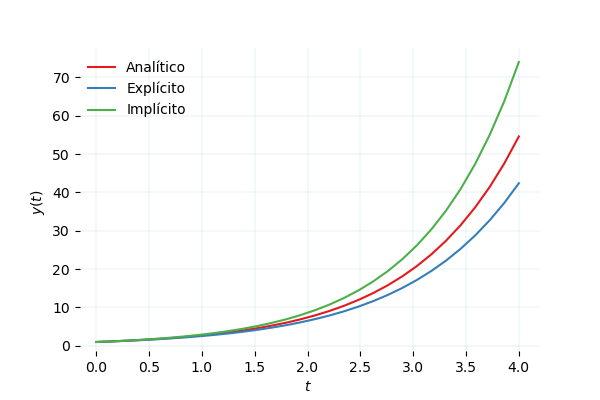

In [6]:
plt.figure()

plt.plot(t, np.exp(t), label="Analítico")
plt.plot(t, y_exp, label="Explícito")
plt.plot(t, y_imp, label="Implícito")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.legend()


## Ecuaciones diferenciales de orden superior

Para ecuaciones diferenciales de orden superior tenemos varias opciones.

Una de ellas es plantear una diferencia finita para la derivada del orden de
interés y proponer el esquema de iteración basado en esta.

Otra opción es reescribir la ecuación diferencial como un sistema de
ecuaciones diferenciales de primer orden y utilizar el método de Euler
(u otro método para ecuaciones de primer orden) para el sistema vectorial
resultante.

Ilustremos ambos métodos con el problema de un sistema masa-resorte.
El problema de valores iniciales para este caso sería

$$m \ddot{x} + k x = 0$$

con $x(0) = 0$ y $\dot{x}(0) = 0$. La ecuación diferencial se puede reescribir
como

$$\ddot{x} + \omega^2 x = 0\, ,$$

cuya solución es

$$x(t) = x_0 \cos \omega t\, ,$$

con $\omega^2 = k / m$.

### Diferencia finita de segundo orden hacia adelante

Si proponemos una diferencia finita de segundo orden hacia adelante, obtenemos 
el siguiente esquema para las iteraciones

$$x^{i + 1} = 2 x^i - [h^2 \omega^2 + 1] x^{i - 1}\, ,$$

que utiliza la información de la solución en los dos instantes anteriores para
calcular el nuevo valor de la solución. Esto presenta problemas para la iteración
del instante $i=1$. En este caso, usaremos una diferencia finita de primer orden
para este instante

$$x^1 = x^0 + h v_0\, ,$$

donde $v_0$ es la velocidad inicial (que en este caso es 0).


<div class="alert-info">
Deduzca la fórmula para las iteraciones presentadas en la celda anterior
a partir de una aproximación parabólica para 3 puntos y calculando
su derivada.
</div>

In [7]:
m = 1
k = 1
ω = np.sqrt(k/m)
x0 = 1
v0 = 0
npts = 500
t = np.linspace(0, 3*np.pi, npts)
h = t[1] - t[0]
x = np.zeros_like(t)
x[0] = x0
x[1] = x[0] + h * v0
for cont in range(1, npts - 1):
    x[cont + 1] = 2*x[cont] - (h**2*ω**2 + 1) * x[cont - 1]

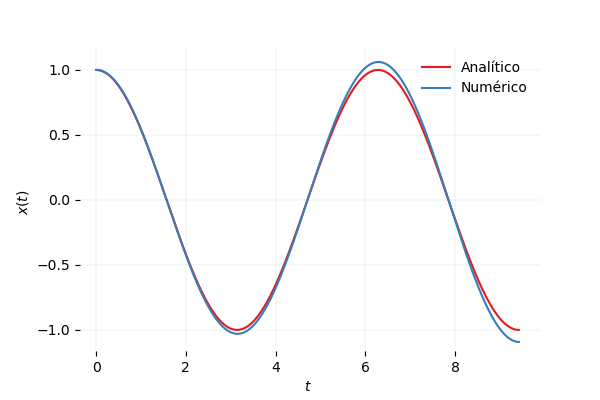

In [8]:
plt.figure()

plt.plot(t, x0*np.cos(ω*t) + v0/ω * np.sin(ω*t), label="Analítico")
plt.plot(t, x, label="Numérico")
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.legend()


### Conversión a sistema de primer orden

En este caso, partimos de convertir el problema a un sistema de ecuaciones
diferenciales de primer orden de la forma

$$\frac{\mathrm{d}}{\mathrm{d}t} \mathbf{u}
= \mathbf{f} (\mathbf{u})\, ,$$

donde $\mathbf{f}$ es una función vectorial del vector de estados $\mathbf{u}$.

En nuestro caso particular, el problema se reescribe como el siguiente
sistema de ecuaciones lineales de primer orden

$$\frac{\mathrm{d}}{\mathrm{d}t} \begin{pmatrix} u_0\\ u_1\end{pmatrix}
= \begin{bmatrix}
0 &1\\
-\omega^2 &0\end{bmatrix} \begin{pmatrix} u_0\\ u_1\end{pmatrix}\, ,$$

con $u_0(0) = x_0$ y $u_1(0) = v_0$.

<div class="alert-info">
Verifique que este sistema es equivalente al problema original.
</div>

Para este problema vectorial, las iteraciones estarían dadas por

$$\mathbf{u}^{i + 1} = \mathbf{u}^i + h A \mathbf{u}^i\, $$

con

$$A = \begin{bmatrix}
0 &1\\
-\omega^2 &0\end{bmatrix}\, .$$

In [9]:
t = np.linspace(0, 3*np.pi, npts)
h = t[1] - t[0]
u = np.zeros((2, npts))
u[:, 0] = x0, v0
A = np.array([
    [0, 1],
    [-ω**2, 0]])
for cont in range(npts - 1):
    u[:, cont + 1] = u[:, cont] + h * A @ u[:, cont]

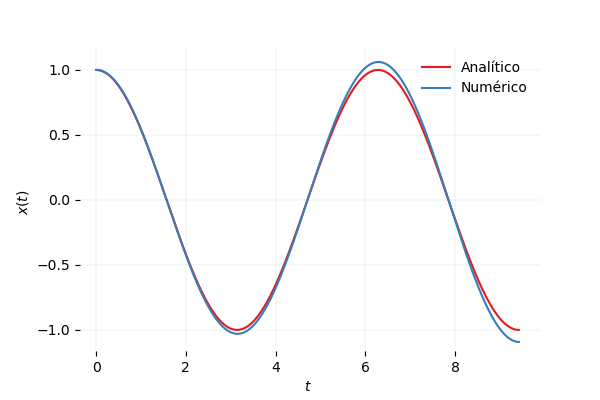

In [10]:
plt.figure()

plt.plot(t, x0*np.cos(ω*t) + v0/ω * np.sin(ω*t), label="Analítico")
plt.plot(t, u[0, :], label="Numérico")
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.legend()
